# ID3 algorithm
### Defining data

In [1]:
import itertools # for cartesian product, powerset and others
import numpy as num
import random
import matplotlib.pyplot as plt
import networkx as nx
import math
#plt.figure(figsize=(20,10))
# Setting number of attributes in observations and number of values for each attribute in a list.
numattributes = 4
valuenumlist = [3]*numattributes
#valuenumlist = [3,3,2]

# set fraction of original observations that are in original observed list
proportion_original = 0.7

# make a list of sets with 'values', one set for each attribute
values = 'abcdefghijklmnopqrstuvwxyz'
attlists = [random.sample(values,i) for i in valuenumlist]
print(attlists)
# sample output
# [{0, 1}, {0, 1}, {0, 1}, {0, 1}]

# compute the number of combinations with a successive cartesian product of sets
observations = attlists[0]
for i in attlists[1:len(attlists)]:
    observations = list(itertools.product(observations,i))
    print(observations)
    #observations = [list(i) for i in observations]
len(observations)

[['e', 'l', 's'], ['p', 'c', 'm'], ['i', 'y', 'c'], ['x', 'z', 'q']]
[('e', 'p'), ('e', 'c'), ('e', 'm'), ('l', 'p'), ('l', 'c'), ('l', 'm'), ('s', 'p'), ('s', 'c'), ('s', 'm')]
[(('e', 'p'), 'i'), (('e', 'p'), 'y'), (('e', 'p'), 'c'), (('e', 'c'), 'i'), (('e', 'c'), 'y'), (('e', 'c'), 'c'), (('e', 'm'), 'i'), (('e', 'm'), 'y'), (('e', 'm'), 'c'), (('l', 'p'), 'i'), (('l', 'p'), 'y'), (('l', 'p'), 'c'), (('l', 'c'), 'i'), (('l', 'c'), 'y'), (('l', 'c'), 'c'), (('l', 'm'), 'i'), (('l', 'm'), 'y'), (('l', 'm'), 'c'), (('s', 'p'), 'i'), (('s', 'p'), 'y'), (('s', 'p'), 'c'), (('s', 'c'), 'i'), (('s', 'c'), 'y'), (('s', 'c'), 'c'), (('s', 'm'), 'i'), (('s', 'm'), 'y'), (('s', 'm'), 'c')]
[((('e', 'p'), 'i'), 'x'), ((('e', 'p'), 'i'), 'z'), ((('e', 'p'), 'i'), 'q'), ((('e', 'p'), 'y'), 'x'), ((('e', 'p'), 'y'), 'z'), ((('e', 'p'), 'y'), 'q'), ((('e', 'p'), 'c'), 'x'), ((('e', 'p'), 'c'), 'z'), ((('e', 'p'), 'c'), 'q'), ((('e', 'c'), 'i'), 'x'), ((('e', 'c'), 'i'), 'z'), ((('e', 'c'), 'i'), '

81

In [2]:
# set the number of positive instances in the rule (has to be less than  or equal to number of observations)
#numpositiveinstance = int(len(observations)*1/2)

# flatten the nested tuples nature of observations to a list of lists

def flattentup(tup):
    flatlist = []
    for elt in tup:
        #print(elt,type(elt))
        if type(elt) is not tuple:
            #print('elt appended')
            flatlist.append(elt)
        else:
            #print('calling recursive')
            flatlist = flatlist + flattentup(elt)
    return flatlist

observationslist = [flattentup(elt) for elt in observations]
#print(observationslist)

# now make a powerset of possible combinations of observations that satisfy the 'rule' - each combination is a hypothesis
# taking powerset recipe from itertools library documentation https://docs.python.org/3/library/itertools.html
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# the total number of hypotheses, including one that none of the observations are positive for category X 
# is 2^n where n is the total number of possible observations

numhypotheses = 2**len(observations)
# 65536!!! As you can see this is an expensive computation. we need ways to specify constraints on possible hypotheses
# some hypotheses will allow only one set of values in the condition for one attribute,
# so every attribute looks like attribute1 in {0,1} and attribute2 in {1} and attribute3 in {0,1} and attribute4 in {0,1}
# there is no giant OR that includes a different set of attributes.
# we'll call these simple hypotheses.
# the above is an example of a simple conjunction hypothesis.
# we can also have a simple disjunction hypothesis: attribute1 in {0} or attribute2 in {1}
# or we can have simple single value hypotheses such as: attribute3 in {0}
# if we are able to eliminate in the order of Occam's razor, then we can move onto more complex hypotheses in order of
# the number of positive instances for the rule. 

# how to compute number of all possible simple single value hypotheses:
# it is the product of number of values of each attribute. 
num_simple_singlevalue_hypotheses = sum(valuenumlist)
# 8 for above example

num_simple_conjunction = num.prod([(2**i)-1 for i in valuenumlist]) # only an and in condition involving the attributes. 
# this will include one hypothesis with every single possible value as a positive instance. 
# 81

#num_simple_disjunction
# only one or in condition
# need to look at only two, to all. 
# total number of combinations for one attribute value (cannot include all or none) = (2**numvaluelist[i]) - 2
powerterm = (2**valuenumlist[0]) - 2
num_simple_disjunction = powerterm
for i in range(1,len(valuenumlist)):
    powerterm =powerterm*((2**valuenumlist[i])-2)
    num_simple_disjunction = num_simple_disjunction + powerterm
# 30

print(num_simple_singlevalue_hypotheses,num_simple_disjunction, num_simple_conjunction)

# make a random 16C8 selection.

12 1554 2401


In [3]:
# function to get a dictionary of attribtues in a dataset (excepting the classification data column) as keys mapped to  
# their possible values
def get_attsets(data,Y='Y'):
    attsetskey = list(data.columns)
    #print(attsetskey)
    if Y in attsetskey:
        attsetskey.remove(Y)
    #print(attsetskey)
    attsetsvalue = [list(data[i].unique()) for i in attsetskey]
    attsets = dict(zip(attsetskey,attsetsvalue))
    attsetscopy = dict()
    for (key,values) in attsets.items():
        if len(values)>1:
            attsetscopy[key] = values
    return attsetscopy


In [4]:
import pandas as pd
datafull = pd.DataFrame.from_records(observationslist)
datafull.columns = [str(i) for i in datafull.columns]
attsets = get_attsets(datafull)
attsets

{'0': ['e', 'l', 's'],
 '1': ['p', 'c', 'm'],
 '2': ['i', 'y', 'c'],
 '3': ['x', 'z', 'q']}

In [5]:
# Random rule generation 
#selection = random.sample(range(len(observationslist)),numpositiveinstance)
#selection.sort()
#Y = [1 if i in selection else 0 for i in range(len(observations))]
#print(selection)
#print(observationslist)
#print(Y)

In [6]:
# setting a single value hypotheses such as att '2' == 'x'
# hypothesis_attribute = random.sample(list(attsets.keys()),1)[0]
# print(hypothesis_attribute)
# hypothesis_value = random.sample(attsets[hypothesis_attribute],1)[0]
# print(hypothesis_value)
# Y = [1 if datafull.iloc[i,hypothesis_attribute]==hypothesis_value else 0 for i in range(len(datafull)) ]

In [7]:
# # setting a simple 'and' hypothesis such as (att '2' == 'x') and (att '1' == 'e') with max 2 attributes.
# hypothesis_attribute = random.samplelist(attsets.keys()),2)
# print(hypothesis_attribute)
# hypothesis_value = [random.sample(attsets[hypothesis_attribute[i]],1)[0] for i in range(len(hypothesis_attribute))]
# print(hypothesis_value)
# Y = [1 if (datafull.iloc[i,hypothesis_attribute[0]]==hypothesis_value[0]) and (datafull.iloc[i,hypothesis_attribute[1]]==hypothesis_value[1]) else 0 for i in range(len(datafull)) ]

In [8]:
#setting a simple 'and' hypothesis such as (att '2' == 'x') and (att '1' == 'e') with spec no of rule attributes.
# hypothesis_attribute = random.sample(list(attsets.keys()),4)
# print(hypothesis_attribute)
# hypothesis_value = [random.sample(attsets[hypothesis_attribute[i]],1)[0] for i in range(len(hypothesis_attribute))]
# print(hypothesis_value)
# ind = set(datafull.index)
# for i in range(len(hypothesis_attribute)):
#     ind = ind.intersection(datafull[datafull[hypothesis_attribute[i]]==hypothesis_value[i]].index)
#     print(ind)

# Y = [1 if i in ind else 0 for i in list(datafull.index) ]

In [9]:
# setting a simple 'or' hypothesis (one value per attribute only for now)
# hypothesis_attribute = random.sample(list(attsets.keys()),3)
# print(hypothesis_attribute)
# hypothesis_value = [random.sample(attsets[hypothesis_attribute[i]],1)[0] for i in range(len(hypothesis_attribute))]
# print(hypothesis_value)

# ind = set()
# for i in range(len(hypothesis_attribute)):
#     ind = ind.union(datafull[datafull[hypothesis_attribute[i]]==hypothesis_value[i]].index)
#     print(len(ind))

# Y = [1 if i in ind else 0 for i in list(datafull.index) ]

In [10]:
# setting a simple 'or' hypothesis (two or more values for one attribute only)
hypothesis_attribute = random.sample(list(attsets.keys()),1)[0]
print(hypothesis_attribute)
hypothesis_value = random.sample(attsets[hypothesis_attribute],2) 
print(hypothesis_value)
ind = set()
for i in range(len(hypothesis_value)):
    ind = ind.union(datafull[datafull[hypothesis_attribute]==hypothesis_value[i]].index)
    print(len(ind))

Y = [1 if i in ind else 0 for i in list(datafull.index) ]

0
['e', 'l']
27
54


In [11]:
datafull['Y'] = Y
#datafull = pd.read_csv('ID3sampledata.csv',index_col=0)
#data.to_csv('ID3sampledata.csv')
datafull.columns = [str(i) for i in datafull.columns]
datafull['Y'] = datafull['Y'].replace(to_replace = [0,1],value = ['zero','one'])
datafull['Y'].value_counts()

one     54
zero    27
Name: Y, dtype: int64

In [12]:
proportion_original = 0.2
selection = random.sample(list(datafull.index),int(proportion_original*len(datafull)))
selection.sort()
not_selection = list(set(datafull.index)-set(selection))
data = datafull.iloc[selection,:]
data_rem = datafull.iloc[not_selection,:]
#print(data)
#print(data_rem)
attsets = get_attsets(data,Y='Y')
attsets
print("No. of observations so far",len(data))
# 
#print(attsets)
# for each attribute, what are the number of positive and negative instances
#display_one = pd.Series()
#display_zero = pd.Series()
display = pd.DataFrame()
print(data.loc[data['0']=='a','Y'].value_counts().index)

No. of observations so far 16
Index([], dtype='object')


In [13]:
for att in attsets:
    #print(data[att].value_counts())
    for v in attsets[att]:
        #print(att,v)
        #print(data.loc[data[att]==v,'Y'].value_counts())
        if 'one' in data.loc[data[att]==v,'Y'].value_counts().index:
            display.loc[str(att)+'_'+str(v),'one'] = data.loc[data[att]==v,'Y'].value_counts().loc['one']
        else:
            display.loc[str(att)+'_'+str(v),'one'] = 0
        if 'zero' in data.loc[data[att]==v,'Y'].value_counts().index:
            display.loc[str(att)+'_'+str(v),'zero'] = data.loc[data[att]==v,'Y'].value_counts().loc['zero']
        else:
            display.loc[str(att)+'_'+str(v),'zero'] = 0
display

,one,zero
0_e,5.0,0.0
0_l,4.0,0.0
0_s,0.0,7.0
1_p,5.0,4.0
1_c,3.0,2.0
1_m,1.0,1.0
2_i,3.0,3.0
2_c,4.0,1.0
2_y,2.0,3.0
3_z,4.0,3.0


In [14]:
# data = pd.DataFrame()
# #data['Day'] = pd.Series(range(1,15,1))
# data['Outlook'] = pd.Series(['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'])
# data['Temp'] = pd.Series(['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'])
# data['Humidity'] = pd.Series(['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'])
# data['Wind'] = pd.Series(['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'])
# data['Decision'] = pd.Series(['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No'])
# data

In [15]:
# Function to calculate entropy of a dataset
def calc_H(subdata,Y = 'Y'):
    p = subdata[Y].value_counts()/len(subdata[Y])
    plogp = pd.Series(-i*math.log(i,2) for i in p)
    H = plogp.sum()
    return H

def calc_H_p(subdata,Y = 'Y'):
    p = subdata[Y].value_counts()/len(subdata[Y])
    plogp = pd.Series(-i*math.log(i,2) for i in p)
    H = plogp.sum()
    return (H,p)

In [16]:
# functions to calculate Information gain, and to get the max information gain attribute from a dataset
import math
def IG(subdata,att,values,HS, Y = 'Y'):
    m = subdata[str(att)].value_counts()/len(subdata[str(att)]) 
    #print('Proportion in each value of attribute ',att)
    #print(m)
    Hatt = dict()
    matt = dict()
    mHatt = dict()
    for k in values:
        subdata1 = subdata[subdata[str(att)]==k]
        #print('Attribute: ',att,'   Value: ',k)
        Hatt[k] = calc_H(subdata1,Y)
        #print('Entropy of ',k,Hatt[k])
        #print(m[k])
        mHatt[k] = m[k]*Hatt[k]
        #print(mHatt[k])
    return (HS - sum([v for (k,v) in mHatt.items()]))

In [17]:
def IG_matt_Hatt(subdata,att,values,HS,Y = 'Y'):
    m = subdata[str(att)].value_counts()/len(subdata[str(att)]) 
    print('Proportion in each value of attribute ',att)
    print(m)
    Hatt = dict()
    matt = dict()
    mHatt = dict()
    for k in values:
        subdata1 = subdata[subdata[str(att)]==k]
        print('Attribute: ',att,'   Value: ',k)
        Hatt[k] = calc_H(subdata1,Y)
        print('Entropy of ',k,Hatt[k])
        mHatt[k] = m[k]*Hatt[k]
        print('mhatt',mHatt[k])
        IG = (HS - sum([v for (k,v) in mHatt.items()]))
    return (IG,m,Hatt)

def get_maxIG_att(subdata,HS,Y='Y'):
    maxIG = 0
    maxIGatt = ''
    #print('HS = ',HS)
    attIGdict = dict()
    attsets = get_attsets(subdata,Y)
    for att in attsets:
        currentIG = IG(subdata,att,attsets[att],HS,Y)
        if currentIG>maxIG:
            maxIG = currentIG
            maxIGatt= att
    return (maxIGatt,maxIG)    

In [18]:
# getting IG for each attribute: (changed print options in IG_matt_Hatt function temporarily)
#for att in attsets.keys():
#    print(IG_matt_Hatt(data,att,attsets[att],HS,Y = 'Y'),'\n')

In [19]:
newdata = data.copy().append(data_rem.iloc[0])
#newdata
display_new = pd.DataFrame()
for att in attsets:
    #print(data[att].value_counts())
    for v in attsets[att]:
        #print(att,v)
        #print(data.loc[data[att]==v,'Y'].value_counts())
        display_new.loc[str(att)+'_'+str(v),'one'] = newdata.loc[newdata[att]==v,'Y'].value_counts().loc['one']
        display_new.loc[str(att)+'_'+str(v),'zero'] = newdata.loc[newdata[att]==v,'Y'].value_counts().loc['zero']
display_new
# for obs in data_rem.transpose():
#     print(obs)

KeyError: 'the label [zero] is not in the [index]'

In [20]:
#IG(data,'Humidity',get_attsets(data,'Decision')['Humidity'],calc_H(data,Y='Decision'),'Decision')
HS = calc_H(data,'Y')
IG(data,'0',attsets['0'],HS, Y = 'Y')
#get_maxIG_att(data,HS,'Y')

0.9886994082884974

In [21]:
# function to subset data
def get_subdata(data1,att,value):
    return data1[data[att]==value]

In [22]:
import networkx as nx
G = nx.DiGraph()
open_branches = []
Y = 'Y'
currentnode = 0
nodenum = 1
currentdata = data
G.add_node(currentnode)
open_branches.append(currentnode)
uniquevals = list(data[Y].unique())
for i in uniquevals:
    G.add_node(i)


In [23]:
all_branches_done = 0
while all_branches_done==0:
    print('Currentnode: ',currentnode)
    HS = calc_H(currentdata,Y)
    print('Entropy: ',HS)
    maxIGatt = []
    maxIG = []
    if HS>0:
        print('Getting max IG attribute')
        IGatttup = get_maxIG_att(currentdata,HS,Y)
        maxIGatt = IGatttup[0]
        maxIG = IGatttup[1]
        print('Max IG attribute is: ',maxIGatt,maxIG)
        # calculating values present in current subset of dataset for max IG att
        values = get_attsets(currentdata,Y)[maxIGatt]
        for v in values:
            # adding branches for each value of max IG attribute
            G.add_edge(currentnode,nodenum)
            open_branches.append(nodenum)
            G.nodes[nodenum]['att'] = maxIGatt
            G.nodes[nodenum]['value'] = v
            nodenum = nodenum+1
        open_branches.remove(currentnode)
        print('Added nodes: ',list(G.successors(currentnode)))
    else:
        print('Reached entropy = 0 on one branch')
        uniquevalue = list(currentdata[Y].unique())[0]
        G.add_edge(currentnode,uniquevalue)
        open_branches.remove(currentnode)
#         pred = list(G.predecessors(currentnode))[0]
#         currentnode = pred
#         print('Going up one node to ',currentnode)
#         while (len(open_branches)==0):
#         open_branches = [i for i in list(G.successors(currentnode)) if not(any([nx.has_path(G,currentnode,v) for v in uniquevals]))]
#         print('Successors are: ',list(G.successors(currentnode)))
#         print('Open branches are: ',open_branches)
#     open_branches = [i for i in list(G.successors(currentnode)) if not(any([nx.has_path(G,currentnode,v) for v in uniquevals]))]
#     currentnode = open_branches[0]
    # travesing to an open branch
    if len(open_branches)>0:
        currentnode = open_branches[0]
        print('Next current node = ',currentnode)
        path = list(nx.all_simple_paths(G,0,currentnode))[0][1:]
        print('Path to current node',currentnode,path)
        currentdata = data
        for p in path:
            currentdata = get_subdata(currentdata,G.nodes[p]['att'],G.nodes[p]['value']).copy()
        print(currentdata)
    else:
        all_branches_done = 1

Currentnode:  0
Entropy:  0.9886994082884974
Getting max IG attribute
Max IG attribute is:  0 0.9886994082884974
Added nodes:  [1, 2, 3]
Next current node =  1
Path to current node 1 [1]
    0  1  2  3    Y
1   e  p  i  z  one
8   e  p  c  q  one
14  e  c  y  q  one
16  e  c  c  z  one
26  e  m  c  q  one
Currentnode:  1
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  2
Path to current node 2 [2]
    0  1  2  3    Y
28  l  p  i  z  one
31  l  p  y  z  one
35  l  p  c  q  one
36  l  c  i  x  one
Currentnode:  2
Entropy:  0.0
Reached entropy = 0 on one branch
Next current node =  3
Path to current node 3 [3]
    0  1  2  3     Y
55  s  p  i  z  zero
56  s  p  i  q  zero
58  s  p  y  z  zero
59  s  p  y  q  zero
63  s  c  i  x  zero
66  s  c  y  x  zero
79  s  m  c  z  zero
Currentnode:  3
Entropy:  0.0
Reached entropy = 0 on one branch


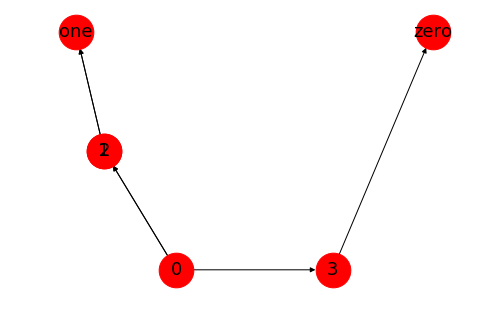

In [24]:
nx.draw_spectral(G,with_labels=True, font_size=18,node_size=1200)

In [25]:
allpaths = list(nx.all_simple_paths(G,0,'No'))
print('Rule for ','No',':')
print('If')
for path in allpaths:
    for p in path[1:len(path)-2]:
        print('( ',G.nodes[p]['att'],'=',G.nodes[p]['value'], ' ) and ',end="")
    print('( ',G.nodes[path[len(path)-2]]['att'],'=',G.nodes[path[len(path)-2]]['value'], ' )',end="")
    if path==allpaths[len(allpaths)-1]:
        break
    else:
        print('\n','Or')    
    


NodeNotFound: target node No not in graph

In [26]:
def print_rule_string(G,decisionval):
    allpaths = list(nx.all_simple_paths(G,0,decisionval))
    print('Rule for ',decisionval,':')
    print('If')
    for path in allpaths:
        for p in path[1:len(path)-2]:
            print('( ',G.nodes[p]['att'],'=',G.nodes[p]['value'], ' ) And ',end="")
        print('( ',G.nodes[path[len(path)-2]]['att'],'=',G.nodes[path[len(path)-2]]['value'], ' )',end="")
        if path==allpaths[len(allpaths)-1]:
            print('\n')
            break
        else:
            print('\n','Or')    

In [27]:
#print_rule_string(G,'zero')
print_rule_string(G,'one')

Rule for  one :
If
(  0 = e  )
 Or
(  0 = l  )



In [28]:
def ID3(data,Y='Y'):
    G = nx.DiGraph()
    open_branches = []
    currentnode = 0
    nodenum = 1
    currentdata = data
    G.add_node(currentnode)
    open_branches.append(currentnode)
    uniquevals = list(data[Y].unique())
    for i in uniquevals:
        G.add_node(i)
    all_branches_done = 0
    while all_branches_done==0:
        #print('Currentnode: ',currentnode)
        HS = calc_H(currentdata,Y)
        #print('Entropy: ',HS)
        maxIGatt = []
        maxIG = []
        if HS>0:
            #print('Getting max IG attribute')
            IGatttup = get_maxIG_att(currentdata,HS,Y)
            maxIGatt = IGatttup[0]
            maxIG = IGatttup[1]
            #print('Max IG attribute is: ',maxIGatt,maxIG)
            # calculating values present in current subset of dataset for max IG att
            values = get_attsets(currentdata,Y)[maxIGatt]
            for v in values:
                # adding branches for each value of max IG attribute
                G.add_edge(currentnode,nodenum)
                open_branches.append(nodenum)
                G.nodes[nodenum]['att'] = maxIGatt
                G.nodes[nodenum]['value'] = v
                nodenum = nodenum+1
            open_branches.remove(currentnode)
            #print('Added nodes: ',list(G.successors(currentnode)))
        else:
            #print('Reached entropy = 0 on one branch')
            uniquevalue = list(currentdata[Y].unique())[0]
            G.add_edge(currentnode,uniquevalue)
            open_branches.remove(currentnode)
        if len(open_branches)>0:
            currentnode = open_branches[0]
            #print('Next current node = ',currentnode)
            path = list(nx.all_simple_paths(G,0,currentnode))[0][1:]
            print('Path to current node',currentnode,path)
            currentdata = data
            for p in path:
                currentdata = get_subdata(currentdata,G.nodes[p]['att'],G.nodes[p]['value']).copy()
            print(currentdata)
        else:
            all_branches_done = 1    
    for uv in uniquevals:
        print_rule_string(G,uv)

In [29]:
ID3(data,'Y')

Path to current node 1 [1]
    0  1  2  3    Y
1   e  p  i  z  one
8   e  p  c  q  one
14  e  c  y  q  one
16  e  c  c  z  one
26  e  m  c  q  one
Path to current node 2 [2]
    0  1  2  3    Y
28  l  p  i  z  one
31  l  p  y  z  one
35  l  p  c  q  one
36  l  c  i  x  one
Path to current node 3 [3]
    0  1  2  3     Y
55  s  p  i  z  zero
56  s  p  i  q  zero
58  s  p  y  z  zero
59  s  p  y  q  zero
63  s  c  i  x  zero
66  s  c  y  x  zero
79  s  m  c  z  zero
Rule for  one :
If
(  0 = e  )
 Or
(  0 = l  )

Rule for  zero :
If
(  0 = s  )



In [ ]:
df = pd.DataFrame()
# unchanged ones and zeroes, take one obs each from data_rem and add to IG

# calculating original values
H_p_orig= calc_H_p(data,'Y')
orig_H = H_p_orig[0]
orig_p_zero = H_p_orig[1][0]
orig_p_one = H_p_orig[1][1]
orig_IG = dict()
orig_matt = dict()
orig_Hatt = dict()
attlist = list(attsets.keys())
for att in attlist:
    values = attsets[att]
    orig_IG_matt_Hatt_tup = IG_matt_Hatt(data,att,values,orig_H,Y = 'Y')
    orig_IG[att] = orig_IG_matt_Hatt_tup[0]
    #orig_matt[att] = orig_IG_matt_Hatt_tup[1].to_dict()
    for key in orig_IG_matt_Hatt_tup[1].to_dict():
        orig_matt[str(att)+'_'+str(key)] = orig_IG_matt_Hatt_tup[1].to_dict()[key]
    #print(orig_matt)
    orig_Hatt = orig_IG_matt_Hatt_tup[2]
    #print(orig_IG[att],orig_matt[],orig_Hatt)
orig_IGmaxtup = get_maxIG_att(data,orig_H,Y='Y')
orig_IGmaxatt = orig_IGmaxtup[0]
orig_IGmax = orig_IGmaxtup[1]

# including obs from data_rem one by one and checking parameters like IG gain, entropy loss etc. 
for obs in data_rem.transpose():
    print('For observation: ',data_rem.loc[obs].to_dict())
    newdata = data.copy().append(data_rem.loc[obs])
    #print(newdata)
    H_p_tup = calc_H_p(newdata,'Y')
    new_H = H_p_tup[0]
    H_change = new_H - orig_H
    new_p_zero = H_p_tup[1][0]
    new_p_one = H_p_tup[1][1]
#    print(new_H,p_zero,p_one,H_change)
    new_IG = dict()
    new_matt = dict()
    new_Hatt = dict()
    for att in attlist:
        values = attsets[att]  # may contain additional values, or may not. 
        new_IG_matt_Hatt_tup = IG_matt_Hatt(newdata,att,values,new_H,Y='Y')
        new_IG[att] = orig_IG_matt_Hatt_tup[0]
        for key in new_IG_matt_Hatt_tup[1].to_dict():
            new_matt[str(att)+'_'+str(key)] = new_IG_matt_Hatt_tup[1].to_dict()[key]
        #print(new_matt)
        new_Hatt = new_IG_matt_Hatt_tup[2]
        #print(new_IG[att],new_matt[att],new_Hatt)
        newIGmaxtup = get_maxIG_att(newdata,new_H,Y='Y')
        new_IGmaxatt = newIGmaxtup[0]
        new_IGmax = newIGmaxtup[1]
    
    
    

In [ ]:
# When to focus on information gathering, and when to start on confirmation of hypotheses?
print(hypothesis_attribute)

In [ ]:
datafull[datafull['Y']=='one']

In [30]:
print(set(datafull.index))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}


In [117]:
attsets

{'0': ['s', 'q', 'f'],
 '1': ['y', 'x', 'r'],
 '2': ['r', 'u', 'y'],
 '3': ['v', 'u', 'h']}